<a href="https://colab.research.google.com/github/rst-analytics/atelier-ml/blob/master/DPE_simul_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine learning sur les DPE (données simulées)

![Texte alternatif…](https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/DPE_-_EPDB_francais.png/220px-DPE_-_EPDB_francais.png) avec ![Tscikit](http://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

## Chargement des libs

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

!pip install graphviz 
! apt-get install graphviz
import graphviz 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 3 not upgraded.


## Simulation des données DPE


In [0]:
def gen_dpe():
  seed = 112

  nb_dpe = 100000

  conso_A = 25
  conso_A_largeur = 25

  conso_B = 70
  conso_B_largeur = 20

  conso_C = 120
  conso_C_largeur = 30

  conso_D = 190
  conso_D_largeur = 40

  conso_E = 280
  conso_E_largeur = 50

  conso_F = 390
  conso_F_largeur = 60

  conso_G = 451

  np.random.seed(seed)
  year1 = np.round(np.random.normal(1950, 5, 25000),0)
  year2 = np.round(np.random.normal(1970, 10, 50000),0)
  year3 = np.round(np.random.uniform(1980,2018, 25000),0)

  annee_construction = np.concatenate((year1, year2, year3))
  
  nombre_niveau = np.random.uniform(1,6, nb_dpe)
  type_energie_id = np.round(np.random.uniform(2,4, nb_dpe),0)
  surface_habitable = np.round(np.random.normal(70, 15, nb_dpe),0)
  hsp_moyenne = np.round(np.random.normal(3, 0.25, nb_dpe),1)
  
  type_batiment_id = np.ones(nb_dpe)
  for i  in range(nb_dpe):
    if nombre_niveau[i] > 2 :
      type_batiment_id[i] = 2
    
  
  consommation_energie = np.zeros(nb_dpe)
  for i in range(nb_dpe):
    if annee_construction[i] > 2016 :
      consommation_energie[i] = conso_A + np.random.normal(0,conso_A_largeur/4)
      continue
    
    if ((annee_construction[i] > 2014) & (type_energie_id[i] == 3)) : 
      consommation_energie[i] = conso_A + np.random.normal(0,conso_A_largeur/4)
      continue
    
    if annee_construction[i] < 1950 :
      consommation_energie[i] = conso_G + np.random.normal(0,20)
      continue
      
    if annee_construction[i] > 2010 : 
      consommation_energie[i] = conso_B + np.random.normal(0,conso_B_largeur/2)
      continue 
    
    if ((annee_construction[i] > 2008) & (type_energie_id[i] == 3)) : 
      consommation_energie[i] = conso_B + np.random.normal(0,conso_B_largeur/2)
      continue  
    
    if ((annee_construction[i] > 1990) & (type_energie_id[i] == 3) & (surface_habitable[i] < 70)) : 
      consommation_energie[i] = conso_C + np.random.normal(0,conso_C_largeur/2)
      continue 
    
    if annee_construction[i] > 2005 :
      consommation_energie[i] = conso_C + np.random.normal(0,conso_C_largeur/2)
      continue
 
    if ((annee_construction[i] > 1975) & (hsp_moyenne[i] < 3)) : 
      consommation_energie[i] = conso_D + np.random.normal(0,conso_D_largeur/2)
      continue
             
    if ((annee_construction[i] > 1970)) : 
      consommation_energie[i] = conso_E + np.random.normal(0,conso_E_largeur/2)
      continue
     
           
    if ((annee_construction[i] > 1950) & (type_batiment_id[i]<2) ) : 
      consommation_energie[i] = conso_E + np.random.normal(0,conso_E_largeur)
      continue
    
    consommation_energie[i] = conso_F + np.random.normal(0,conso_F_largeur)

    
  classe_consommation_energie = np.empty(nb_dpe, dtype=str)

  for i in range(nb_dpe):
     if consommation_energie[i] < 50 :
        classe_consommation_energie[i] = "A"
        continue
    
     if consommation_energie[i] < 91 :
        classe_consommation_energie[i] = "B"
        continue
    
     if consommation_energie[i] < 151 :
        classe_consommation_energie[i] = "C"
        continue
    
     if consommation_energie[i] < 231 :
        classe_consommation_energie[i] = "D"
        continue

     if consommation_energie[i] < 331 :
        classe_consommation_energie[i] = "E"
        continue
    
     if consommation_energie[i] < 451 :
        classe_consommation_energie[i] = "F"
        continue
    
     classe_consommation_energie[i] = "G"
  
  dpe_classes = pd.Series(classe_consommation_energie, name="classe_consommation_energie")
  
  

  dataset = np.column_stack((
                          consommation_energie,annee_construction,
                          nombre_niveau,type_energie_id,surface_habitable,
                          hsp_moyenne,type_batiment_id
                          ))


  dpe_df = pd.DataFrame(dataset)
 

  dpe_df = dpe_df.astype({0: int,
                        1 : int, 
                        2 : int,
                        3 : int,
                        4 : int,
                        5 : int,
                        6 : int
                       })

   
  
  
  dpe_df = pd.concat([dpe_df,dpe_classes], axis=1)

 

  dpe_df = dpe_df.rename(index=str, columns={0: "consommation_energie",
                                          1 : "annee_construction",
                                          2 : "nombre_niveau",
                                          3 : "type_energie_id",
                                          4 : "surface_habitable",
                                          5 : "hsp_moyenne",
                                          6 : "type_batiment_id",
                                          })

  
  
  return dpe_df

## Chargement et visualisation des DPE

In [9]:
dpe_df = gen_dpe()

dpe_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
consommation_energie           100000 non-null int64
annee_construction             100000 non-null int64
nombre_niveau                  100000 non-null int64
type_energie_id                100000 non-null int64
surface_habitable              100000 non-null int64
hsp_moyenne                    100000 non-null int64
type_batiment_id               100000 non-null int64
classe_consommation_energie    100000 non-null object
dtypes: int64(7), object(1)
memory usage: 6.9+ MB


In [4]:
dpe_df.head()

,consommation_energie,annee_construction,nombre_niveau,type_energie_id,surface_habitable,hsp_moyenne,type_batiment_id,classe_consommation_energie
0,476,1947,1,3,60,2,1,G
1,451,1933,2,3,70,2,2,G
2,451,1943,1,3,81,3,1,G
3,457,1942,4,2,66,2,2,G
4,429,1942,1,4,84,2,1,F


In [5]:
dpe_df["classe_consommation_energie"].value_counts()

E    31721
F    28146
G    15849
D    13167
C     5425
B     3953
A     1739
Name: classe_consommation_energie, dtype: int64

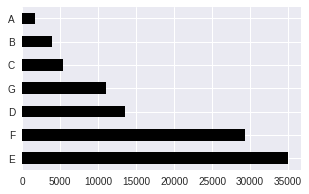

In [10]:
dpe_df.classe_consommation_energie.value_counts().plot.barh(color='k',figsize=[5,3])
sns.despine()

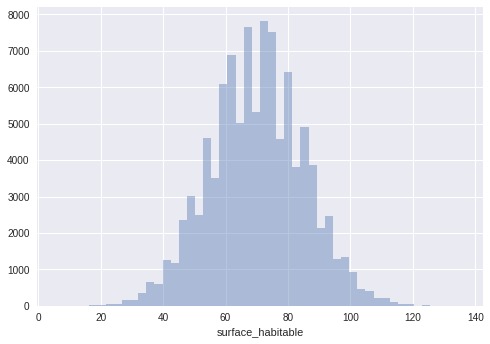

In [12]:
dpe_surf = dpe_df["surface_habitable"]
dpe_surf = dpe_surf[(dpe_surf < 300)]
sns.distplot(dpe_surf,kde=False,)

## Préparation des données pour le ML

#### Certaines colonnes sont des *catégories* et non des réels

In [14]:

dpe_df["classe_consommation_energie"] = dpe_df["classe_consommation_energie"].astype('category')
dpe_df["type_energie_id"] = dpe_df["type_energie_id"].astype('category')
dpe_df["type_batiment_id"] = dpe_df["type_batiment_id"].astype('category')

dpe_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 0 to 99999
Data columns (total 8 columns):
consommation_energie           100000 non-null int64
annee_construction             100000 non-null int64
nombre_niveau                  100000 non-null int64
type_energie_id                100000 non-null category
surface_habitable              100000 non-null int64
hsp_moyenne                    100000 non-null int64
type_batiment_id               100000 non-null category
classe_consommation_energie    100000 non-null category
dtypes: category(3), int64(5)
memory usage: 7.4+ MB


### On supprime les colonnes classes et conso (sinon c'est trop facile !!)

In [0]:
target = dpe_df["classe_consommation_energie"]
data = dpe_df.copy()
data = data.drop(columns=["classe_consommation_energie"])
data = data.drop(columns=["consommation_energie"])

### Astuces pour gérer les catégories (python est moins fort que R sur ce point) et les labels

In [0]:
X = pd.get_dummies(data)
names = X.columns.values

In [0]:
le = preprocessing.LabelEncoder()
le.fit(target)
y = le.transform(target)

### Création de la base d'apprentissage (80% des données) et de la base de test (20 % des données)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42) # seed à 42 ... pourquoi 42 ? eheheheh

#### Les dimensions pour s'en convaincre

In [19]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

print(X_train.shape)

80000
80000
20000
20000
(80000, 9)


## Le machine learning (enfin !)


### Exemple 1 : l'algo explicable : DecisionTreeClassifier


In [0]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(X_train, y_train)

In [22]:
from sklearn.metrics import accuracy_score

y_pred_train = clf.predict(X_train)
print(accuracy_score(y_train,y_pred_train)*100)

y_pred_test = clf.predict(X_test)
print(accuracy_score(y_test,y_pred_test)*100)

63.7975
63.94499999999999


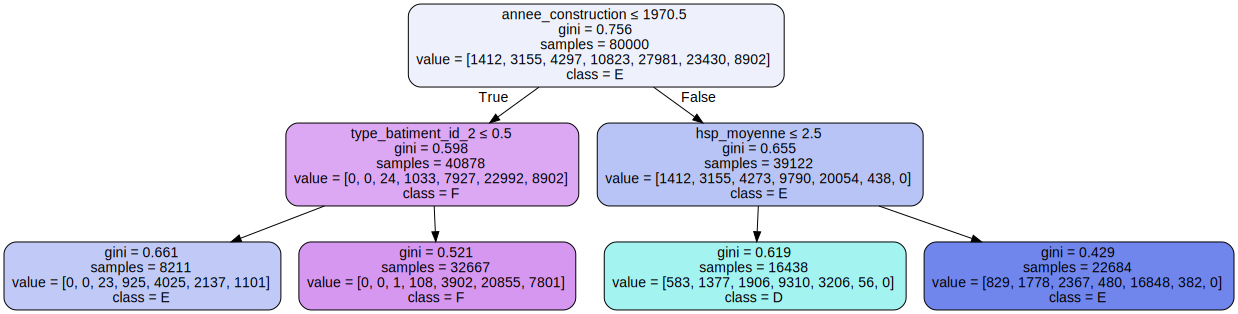

In [23]:
dot_data = sklearn.tree.export_graphviz(clf, out_file=None,   
                         feature_names=names,  
                         class_names=le.classes_,                 
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

### Exemple 2 : Arbre très profond et sur-apprentissage

In [33]:
clf = sklearn.tree.DecisionTreeClassifier(max_depth = 100)
clf = clf.fit(X_train, y_train)

y_pred_train = clf.predict(X_train)
print(accuracy_score(y_train,y_pred_train)*100)

y_pred_test = clf.predict(X_test)
print(accuracy_score(y_test,y_pred_test)*100)

91.54875
70.975


## Exemple 3 : Forêts aléatoires et boîte noire

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(n_estimators=200, max_depth=10)
clf_rf = clf_rf.fit(X_train, y_train)

y_pred_train = clf_rf.predict(X_train)
print(accuracy_score(y_train,y_pred_train)*100)

y_pred_test = clf_rf.predict(X_test)
print(accuracy_score(y_test,y_pred_test)*100)

80.84625
79.335
